In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import time


In [9]:
'''
import_arr = np.genfromtxt("Outputs\scan_153345.dat")
import_df = pd.DataFrame()

print(int(len(import_arr)/1023))
for i in range(int(len(import_arr)/1023)):
    temp_arr = import_arr[i*1023:(i*1023)+1023]
    import_df[str(i)] = temp_arr

import_df.to_csv("20190123_153345.csv",header=False,index=False)
'''

1002


In [10]:
import_df = pd.read_csv('20190123_153345.csv',header=None) #Constant 2.5 ppm CO2
#import_df.head()

<IPython.core.display.Javascript object>


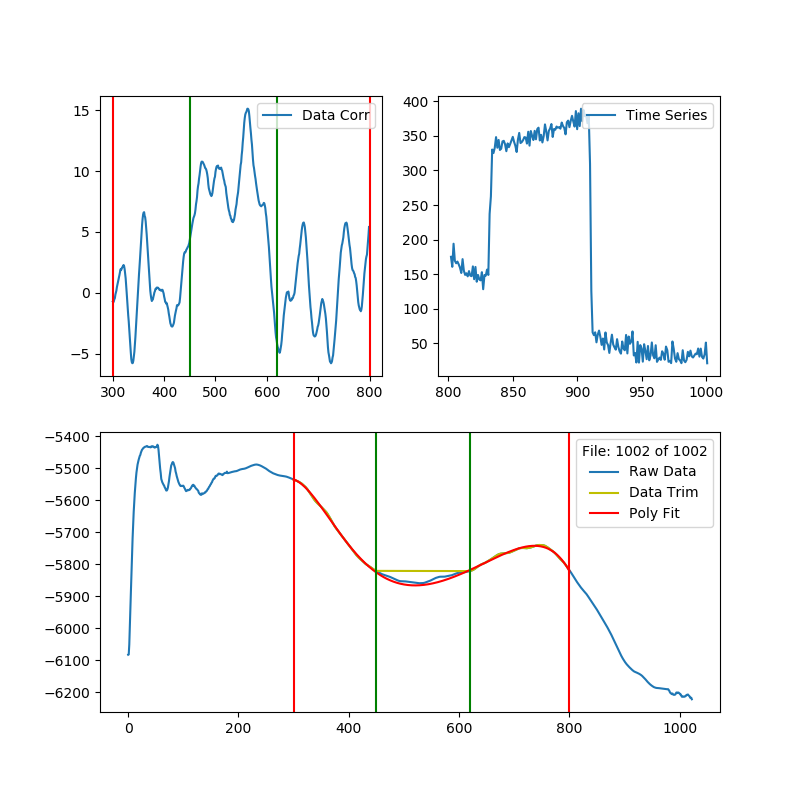

In [13]:
def poly(x,*args):
    f_poly = 0
    for count, coef in enumerate(args):
        f_poly = f_poly + coef*x**count
    return f_poly

%matplotlib notebook
f = plt.figure(figsize=(8, 8))
ax2 = plt.subplot(221)
ax3 = plt.subplot(222)
ax1 = plt.subplot(212)


out_file = open('time_output.txt','w+')

#Define data limits

x_st = 300
x_end = 800
f_st = 450
f_end = 620

#Fit_df = pd.DataFrame()
#Analysis_df = pd.DataFrame()
Delt_2f = np.empty(1)
time_2f = np.empty(1)

for i in range(len(import_df.columns)): #len(import_df.columns)
    #copy data to new DF
    Fit_df = pd.DataFrame()
    Fit_df[0] = import_df[i]
    Fit_df.columns = ['data']

    #trim Raw Data
    Fit_df = Fit_df.drop(Fit_df.index[f_st:f_end])
    Fit_df = Fit_df[x_st:x_end-(f_end-f_st)]

    #Fit data with polynomial
    popt, pconv = curve_fit(poly,Fit_df.index.values,Fit_df['data'],p0=[1,1,1,1,1,1,1])
    #print(popt)

    fit_x = np.linspace(x_st,x_end,x_end-x_st) #fit data x values

    Analysis_df = pd.DataFrame()
    Analysis_df[0] = import_df[i]
    Analysis_df.columns = ['data']
    Analysis_df = Analysis_df[x_st:x_end]

    Analysis_df['data'] = Analysis_df['data']-poly(fit_x,*popt)
    AC_MAX = Analysis_df['data'][f_st-x_st:f_st+(f_end-f_st)].max()
    AC_MIN = Analysis_df['data'][f_st-x_st:f_st+(f_end-f_st)].min()
    Delt_2f = np.append(Delt_2f,AC_MAX-AC_MIN)
    time_2f = np.append(time_2f,i)
    out_file.write(str(AC_MAX-AC_MIN)+'\n')

    ax1.clear()
    ax1.plot(import_df[i], label='Raw Data')
    ax1.plot(Fit_df['data'],'y', label='Data Trim')
    ax1.plot(fit_x,poly(fit_x,*popt),'r',label='Poly Fit')
    ax1.axvline(x=x_st,linewidth=1.5, color='r')
    ax1.axvline(x=x_end,linewidth=1.5, color='r')
    ax1.axvline(x=f_st,linewidth=1.5, color='g')
    ax1.axvline(x=f_end,linewidth=1.5, color='g')
    
    ax2.clear()
    ax2.plot(Analysis_df['data'],label='Data Corr')
    ax2.axvline(x=x_st,linewidth=1.5, color='r')
    ax2.axvline(x=x_end,linewidth=1.5, color='r')
    ax2.axvline(x=f_st,linewidth=1.5, color='g')
    ax2.axvline(x=f_end,linewidth=1.5, color='g')
    #ax2.annotate('File: '+str(i+1)+' of '+str(len(import_df.columns)),xy=(700, -50))
    
    ax3.clear()
    ax3.plot(time_2f[-200:],Delt_2f[-200:],label='Time Series')
    ax3.autoscale_view(scalex=False)
        
    ax1.legend(title='File: '+str(i+1)+' of '+str(len(import_df.columns)),loc="upper right")
    ax2.legend(loc="upper right")
    ax3.legend(loc="upper right")
    
    
    #for ax in axarr.flat:
        #ax.legend(loc="upper right")
    f.canvas.draw()

out_file.close()

